In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data.csv')



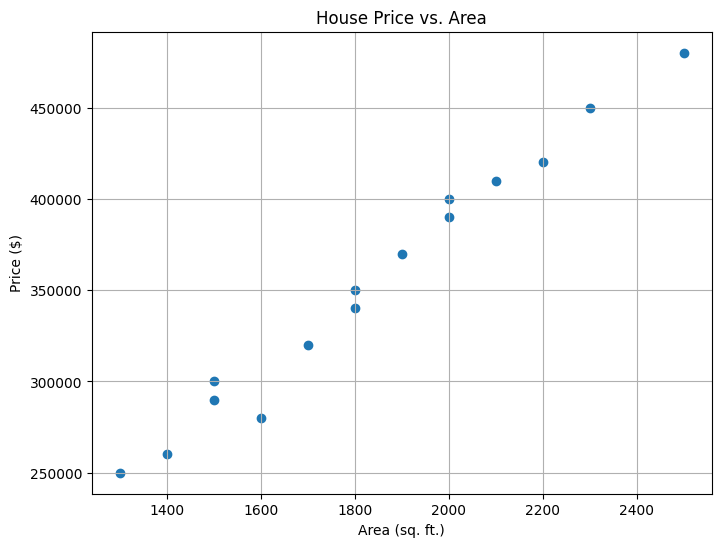

In [50]:

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['Area'], data['Price'])
plt.title('House Price vs. Area')
plt.xlabel('Area (sq. ft.)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

# Testing

In [51]:
def train_mini_linear_forest_closest(data):
    x = data['Area'].values.reshape(-1, 1)
    y = data['Price'].values.reshape(-1, 1)

    # Sort the data points by 'Area'
    sorted_indices = np.argsort(x.flatten())
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]

    # Initialize lists to store intercepts and slopes of mini-linear regressions
    intercepts = []
    slopes = []

    # Perform mini-linear regressions between the closest points
    for i in range(len(x_sorted) - 1):
        lr = LinearRegression()
        lr.fit(x_sorted[i:i+2], y_sorted[i:i+2])

        intercepts.append(lr.intercept_[0])
        slopes.append(lr.coef_[0][0])

    return intercepts, slopes

# Example usage: training the mini-linear forest based on closest points
intercepts, slopes = train_mini_linear_forest_closest(data)


In [52]:
def predict_new_values_closest(new_areas, intercepts, slopes, data):
    x = data['Area'].values.reshape(-1, 1)
    y = data['Price'].values.reshape(-1, 1)

    # Sort the data points by 'Area'
    sorted_indices = np.argsort(x.flatten())
    x_sorted = x[sorted_indices]

    # Predicting 'Price' values for new 'Area' values using the closest segments
    predicted_prices = []
    for area in new_areas:
        for i in range(len(x_sorted) - 1):
            if x_sorted[i][0] <= area <= x_sorted[i+1][0]:
                predicted_price = intercepts[i] + slopes[i] * area
                predicted_prices.append(predicted_price)
                break

    return predicted_prices


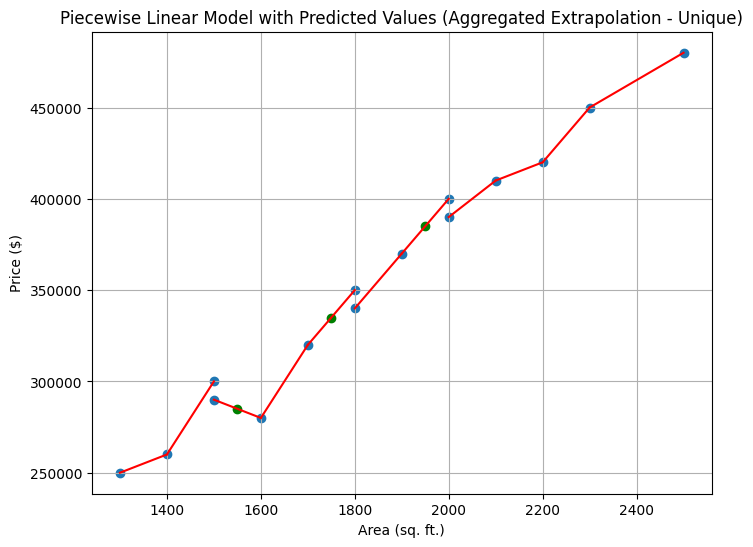

Predicted prices for new areas (aggregated extrapolation - unique): [285000.0, 335000.0, 385000.0]


In [57]:
def predict_and_plot_new_values_closest_aggregated_unique(new_areas, intercepts, slopes, data):
    x = data['Area'].values.reshape(-1, 1)
    y = data['Price'].values.reshape(-1, 1)

    # Sort the data points by 'Area'
    sorted_indices = np.argsort(x.flatten())
    x_sorted = x[sorted_indices]

    # Predicting 'Price' values for new 'Area' values using aggregated extrapolation
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y)
    plt.title('Piecewise Linear Model with Predicted Values (Aggregated Extrapolation - Unique)')
    plt.xlabel('Area (sq. ft.)')
    plt.ylabel('Price ($)')
    plt.grid(True)

    predicted_prices = []
    for area in new_areas:
        predictions = []
        predicted_already_exists = False
        for i in range(len(x_sorted) - 1):
            if x_sorted[i][0] <= area <= x_sorted[i+1][0]:
                predicted_price = intercepts[i] + slopes[i] * area
                if area in x_sorted:
                    predicted_already_exists = True
                predictions.append(predicted_price)
            elif area < x_sorted[0][0] or area > x_sorted[-1][0]:
                predicted_price = intercepts[i] + slopes[i] * area
                predictions.append(predicted_price)

        if predictions and not predicted_already_exists:
            avg_prediction = np.mean(predictions)
            predicted_prices.append(avg_prediction)
            plt.scatter(area, avg_prediction, c='g', marker='o')

    for i in range(len(intercepts)):
        plt.plot(x_sorted[i:i+2], intercepts[i] + np.array(x_sorted[i:i+2]) * slopes[i], c='r')

    plt.show()
    return predicted_prices

# Example usage: predicting prices for new areas and plotting based on closest points with aggregated extrapolation for unique values
new_areas = [1550, 1750, 1950, 2200]  # Including an area outside the dataset's range
predicted_prices = predict_and_plot_new_values_closest_aggregated_unique(new_areas, intercepts, slopes, data)
print("Predicted prices for new areas (aggregated extrapolation - unique):", predicted_prices)
